# Candidate Test 2022 Analysis Part 2

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2). Consider normalizing the data or performing similar scaling transformations as needed.

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:

- An analysis/description of which questions are most crucial concerning their placement on the axes.
- Average positions of parties concerning each question, preferably with accompanying plots of each (or selected) question.
- A clustering analysis where you attempt various cluster numbers, which would correspond to different parties. Discuss whether there is room for more clusters/parties or if a reduction is needed. Make sure you cover: **K-Means, Hierarchical clustering, and DBSCAN.**
- An overview of the political landscape of the elected candidates, highlighting which members agree or disagree the most and which parties or party members have significant disagreements.
- Feel free to explore further and remember that preprocessing, methodology, and evaluation metrics are not mentioned explicitly, but are implicitly assumed.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_excel("alldata.xlsx")  

meta_cols = ['navn', 'parti', 'storkreds', 'alder']
question_cols = [col for col in df.columns if col not in meta_cols]

df_questions = df[question_cols].copy()

df_questions = df_questions.apply(pd.to_numeric, errors='coerce')

scaler = StandardScaler()
questions_scaled = scaler.fit_transform(df_questions)

df_scaled = pd.DataFrame(questions_scaled, columns=question_cols)

# df_scaled.head()

In [223]:
df_full = pd.concat([df[meta_cols], df_scaled], axis=1)
party_means = df_full.groupby("parti")[question_cols].mean()
party_means.head()

,530,531,533,534,535,537,538,540,541,543,...,8a,8b,9a,9b,10a,10b,11a,11b,12a,12b
parti,,,,,,,,,,,,,,,,,,,,,
Alternativet,1.056226,0.890222,-0.920383,-0.497482,-1.275769,-0.982312,0.193900,-0.083557,0.919575,-1.028398,...,0.219233,0.614082,-0.806885,0.197346,-0.517715,0.410566,0.603742,-0.060446,-0.160496,-0.204264
Danmarksdemokraterne,-0.855055,-0.665672,1.310448,0.114386,0.597085,0.204944,-0.668524,0.423243,-1.035164,0.548547,...,-0.104115,0.190428,0.644043,-0.658313,0.347105,0.961069,-0.846559,0.812911,-0.166385,0.589011
Dansk Folkeparti,-0.667748,-0.481924,1.334992,2.009352,0.444959,0.082269,-0.432843,0.213175,-0.735765,0.245214,...,-0.128678,-0.060805,0.820521,-0.266867,0.346659,0.670087,-0.657161,0.753013,0.154641,-0.222468
Det Konservative Folkeparti,-0.854280,-0.974765,0.941024,-0.420551,0.641132,0.995359,-0.754678,0.823969,-0.612245,0.827115,...,0.067824,-0.285183,0.596108,-0.256795,0.792779,-1.225395,-0.733332,0.759381,0.104984,0.103343
Enhedslisten,1.111673,1.342578,-0.935693,1.109034,-1.930925,-1.135721,1.046480,-1.452316,1.229131,-1.258435,...,-0.315554,-0.106720,-1.052855,0.315403,-1.239324,0.952701,0.969192,-1.093168,-1.179121,0.434121


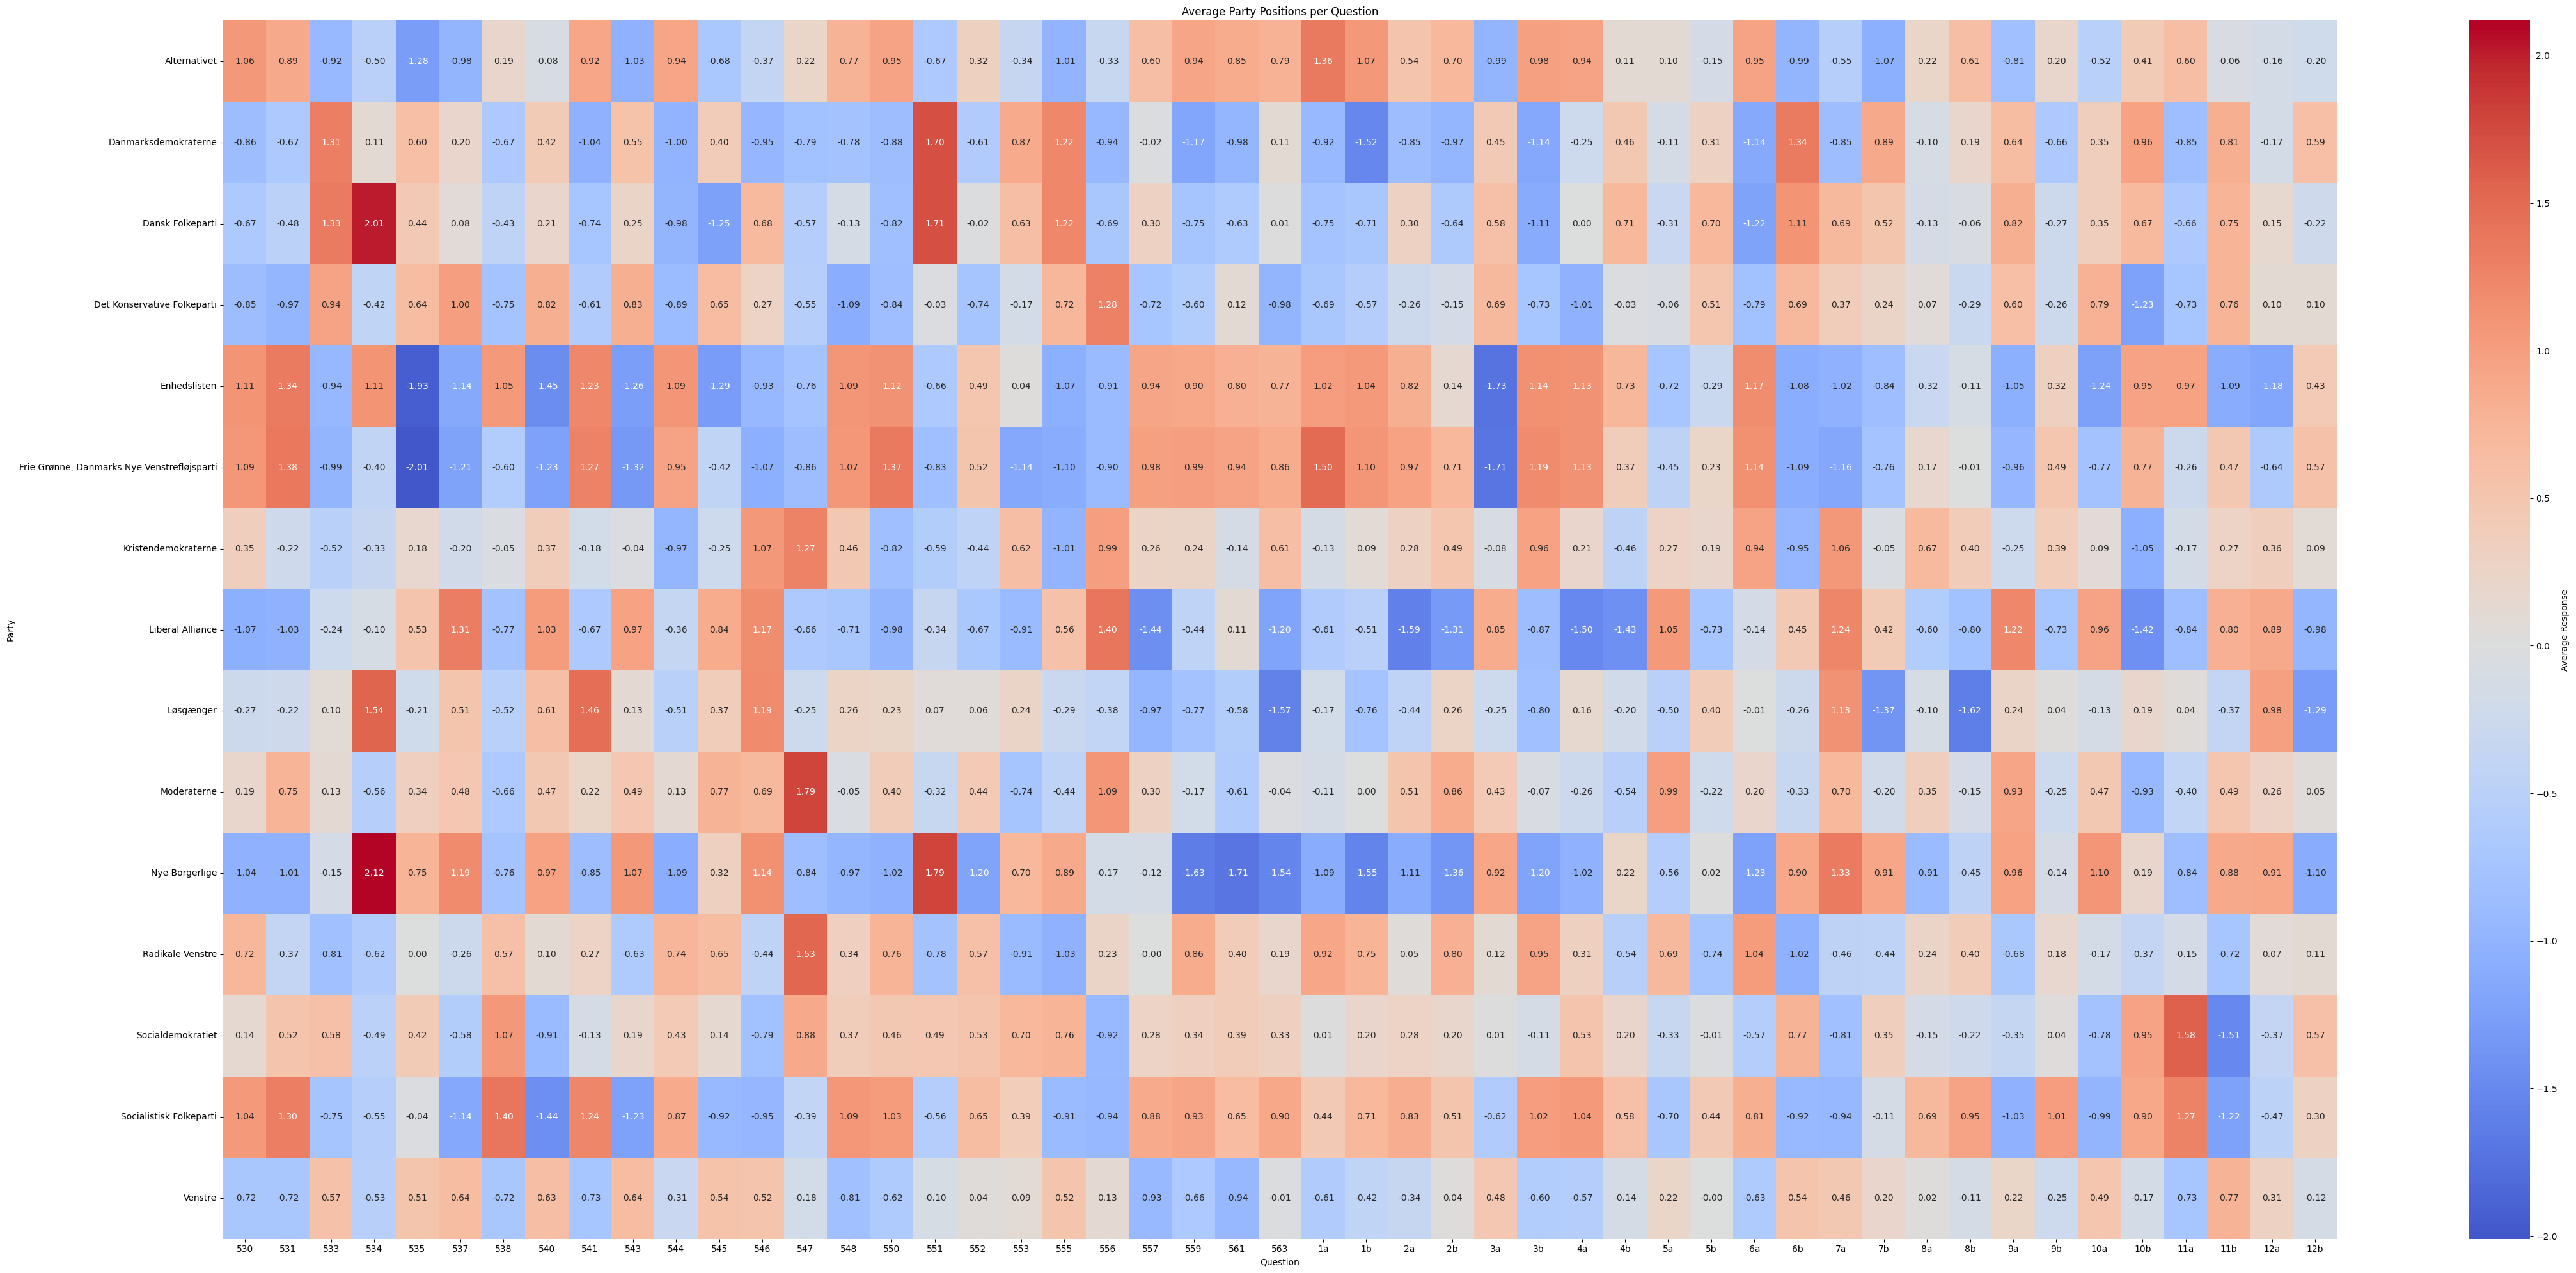

In [230]:
plt.figure(figsize=(45, 20))
sns.heatmap(
    party_means,
    annot=True, fmt=".2f", cmap="coolwarm", center=0,
    cbar_kws={'label': 'Average Response'}
)
plt.title("Average Party Positions per Question")
plt.xlabel("Question")
plt.ylabel("Party")
plt.tight_layout()
plt.show()

In [210]:
from sklearn.decomposition import PCA

# Reduce to 2 dimensions for plotting clusters
# pca = PCA(n_components=2)
pca = PCA(n_components=0.9)
X_pca = pca.fit_transform(df_scaled)

In [211]:
# x_plot = list(range(1, 1 + len(pca.explained_variance_ratio_)))
# plt.plot(x_plot, np.cumsum(pca.explained_variance_ratio_))
# plt.axhline(y=0.9, color='r', linestyle=':', label='90% Variance Threshold')
# plt.xlabel('number of components')
# plt.ylabel('cumulative explained variance')
# #plt.gca().invert_yaxis()
# plt.show()

In [212]:
# Build a DataFrame of loadings
component_names = [f"PC{i+1}" for i in range(pca.n_components_)]
loadings = pd.DataFrame(pca.components_.T,
                        index=question_cols,
                        columns=component_names)

# Sum absolute loadings across PCs to get a total importance
loadings["importance"] = loadings.abs().sum(axis=1)
top10 = loadings.sort_values("importance", ascending=False).head(10)

print("Top 10 questions driving the PCA axes:")
display(top10)

Top 10 questions driving the PCA axes:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,importance
553,-0.015334,0.272808,-0.078879,0.043240,0.242953,0.136874,-0.221672,-0.162255,0.115503,-0.365257,...,0.273324,0.414553,0.233880,-0.176155,-0.084003,-0.140202,-0.043307,0.170665,-0.012930,4.231302
5a,-0.047698,-0.228295,-0.078983,-0.034807,0.218817,-0.190515,0.140061,0.397660,0.287676,-0.210500,...,0.250802,-0.020953,0.075345,0.229763,0.212061,0.080068,-0.068486,-0.075914,-0.049524,4.221924
12b,0.072311,0.076109,-0.284984,0.001783,-0.140508,-0.311499,-0.326856,0.351948,0.222291,-0.015277,...,0.377735,-0.122830,-0.145325,-0.086428,-0.013619,0.079607,-0.009321,0.107297,0.044007,4.137689
8a,0.050785,-0.032092,-0.259444,0.391251,-0.079689,0.114389,0.191872,0.115600,-0.043738,0.074706,...,-0.034904,0.139478,0.399632,0.131751,0.131783,-0.082948,-0.076419,-0.120849,-0.028449,4.056352
12a,-0.105862,-0.118732,0.036426,0.101541,0.206326,0.239130,0.419195,-0.125549,-0.230939,0.053144,...,0.480739,-0.246335,-0.210494,-0.024910,-0.110998,0.015247,0.048692,0.091348,0.043066,3.997845
5b,-0.011245,0.170425,-0.150566,0.409053,-0.221307,0.149886,-0.144959,0.061082,-0.180859,0.069712,...,0.120209,-0.243140,-0.221742,-0.140091,0.426559,0.004882,0.081022,0.054542,-0.166264,3.892942
8b,0.076363,0.017592,-0.166319,0.372635,-0.047202,0.129852,0.295750,0.316054,-0.013885,-0.099784,...,-0.144066,0.034741,-0.043283,0.198243,-0.355658,-0.005531,-0.063709,0.068323,0.113587,3.891283
552,0.117964,-0.001487,-0.156558,-0.079402,0.157558,-0.200527,0.085159,-0.012633,0.107150,0.575891,...,0.093363,-0.174743,0.282774,-0.203410,-0.135027,-0.040189,-0.033270,-0.024286,-0.040013,3.701708
2b,0.124494,-0.100392,-0.251010,0.066498,0.064187,-0.245478,-0.046021,-0.318481,-0.040751,0.057488,...,-0.055352,-0.044395,0.125161,0.195622,0.155950,-0.144615,-0.196868,-0.291123,-0.065652,3.676634
4b,0.061882,0.258449,0.038475,0.168716,-0.107661,-0.114117,0.029684,-0.250623,-0.041912,0.077328,...,0.451669,0.133242,-0.046445,0.052921,-0.180773,-0.210558,-0.013868,-0.119407,-0.021679,3.670466


/Users/sebinko/Library/CloudStorage/OneDrive-ViaUC/SEMESTER_4/MAL1/git/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


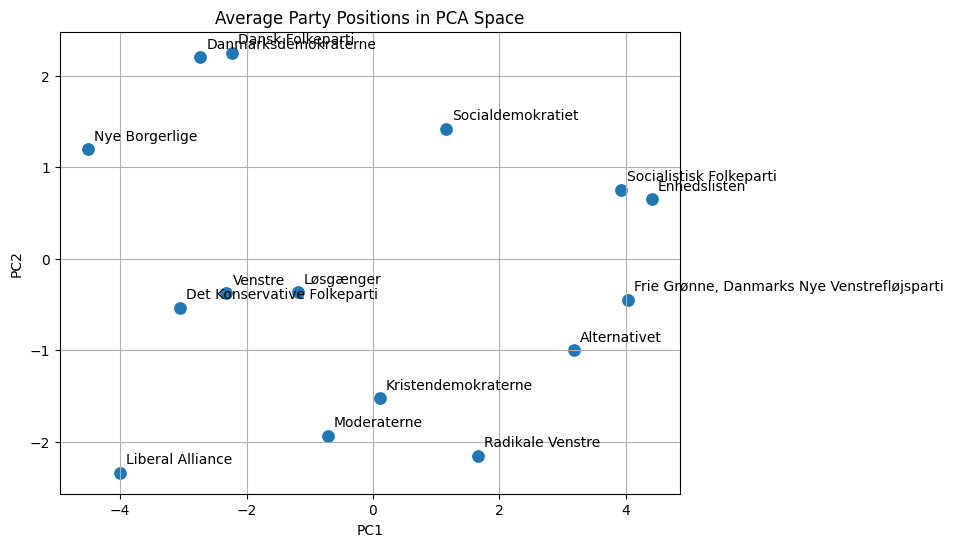

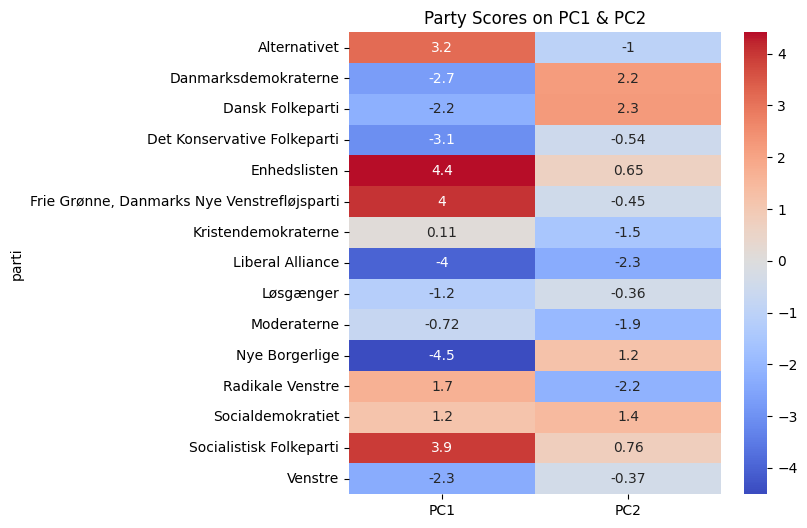

In [213]:
# 1. Scale the party means just like the individual rows
party_scaled = scaler.transform(party_means)
# 2. Project into PCA‐space
party_pcs = pca.transform(party_scaled)
party_positions = pd.DataFrame(
    party_pcs,
    index=party_means.index,
    columns=component_names
)
# 3. Scatter plot of parties on PC1 vs PC2
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="PC1", y="PC2",
    data=party_positions,
    s=100
)
for party, coords in party_positions.iterrows():
    plt.text(coords.PC1 + 0.1, coords.PC2 + 0.1, party)
plt.title("Average Party Positions in PCA Space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()
# 4. Heatmap of party scores on PC1 & PC2
plt.figure(figsize=(6, 6))
sns.heatmap(
    party_positions.loc[:, ["PC1", "PC2"]],
    annot=True, cmap="coolwarm", center=0
)
plt.title("Party Scores on PC1 & PC2")
plt.show()

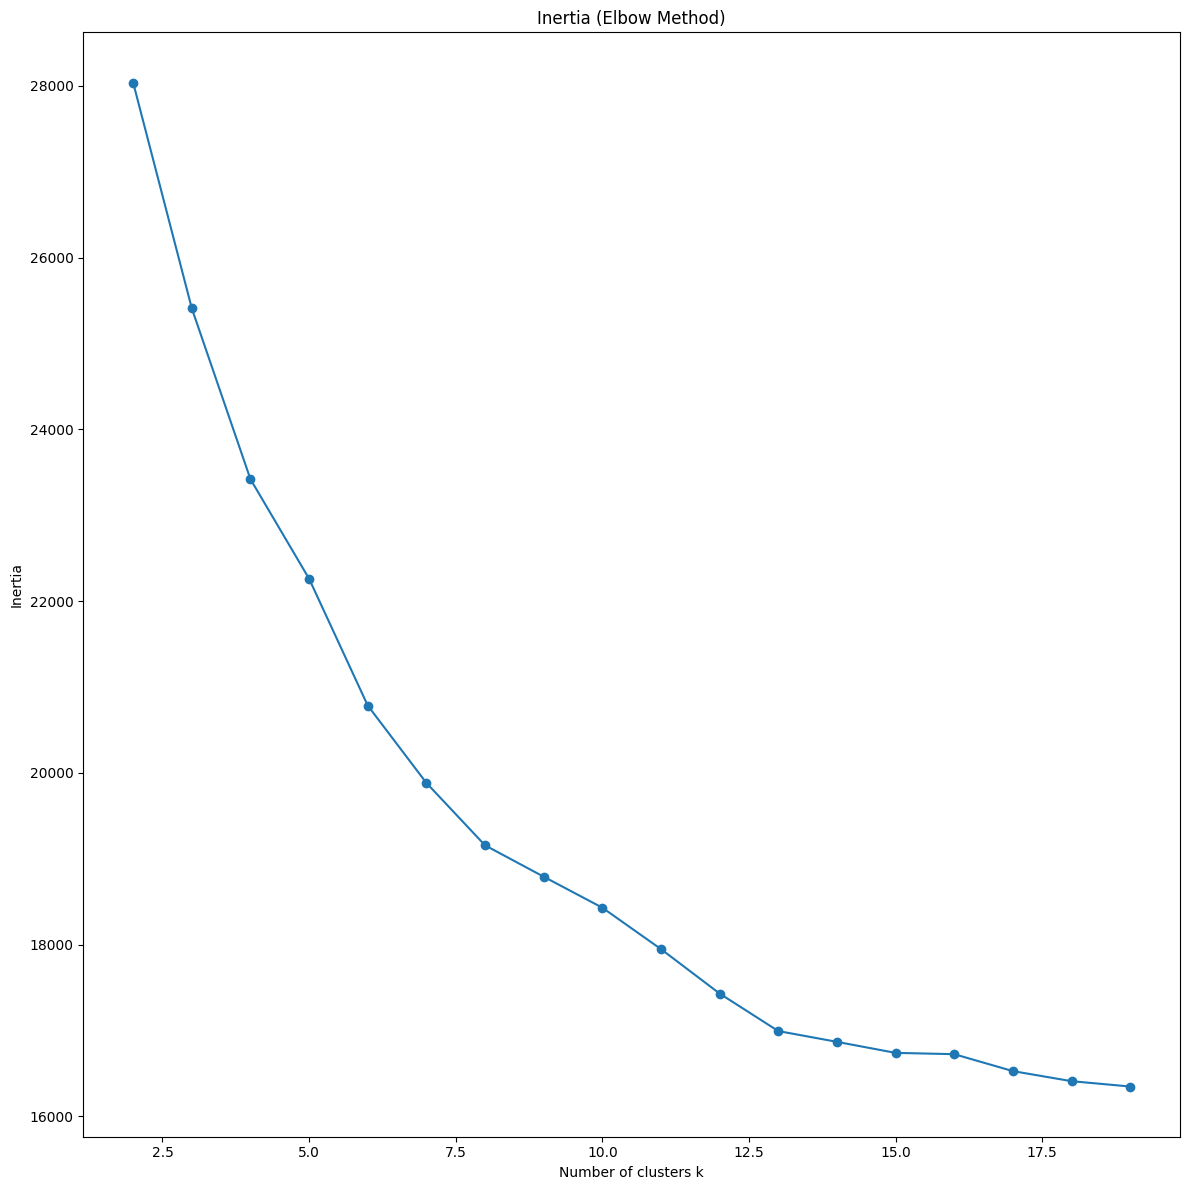

In [214]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertias = []
silhouettes = []
k_values = range(2, 20)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(df_scaled, labels))

# Plot the results
plt.figure(figsize=(12, 12))

plt.plot(k_values, inertias, marker='o')
plt.title('Inertia (Elbow Method)')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')
plt.tight_layout()
plt.show()

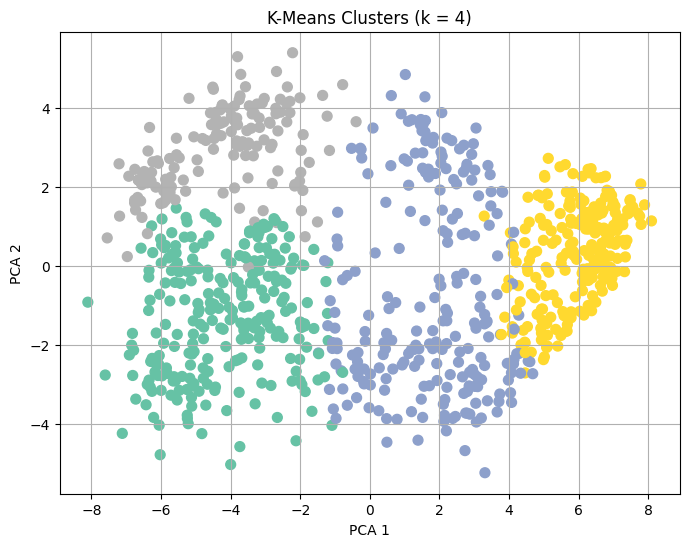

In [215]:
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(df_scaled)

# Plot in 2D PCA space
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='Set2', s=50)
plt.title('K-Means Clusters (k = 4)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

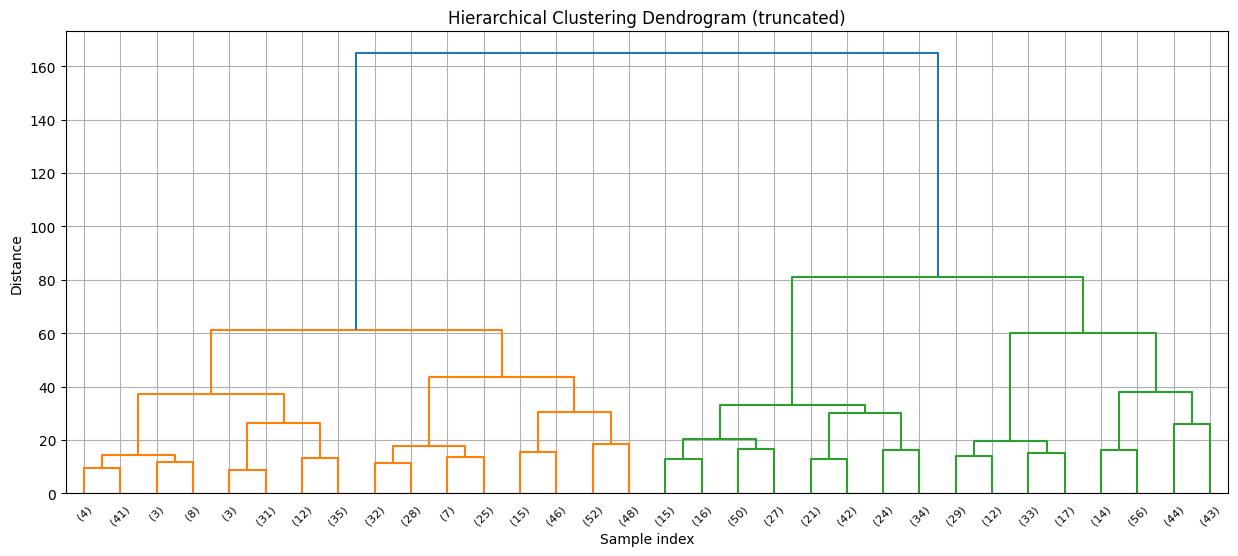

In [216]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

linkage_matrix = linkage(df_scaled, method='ward')

plt.figure(figsize=(15, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=4)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

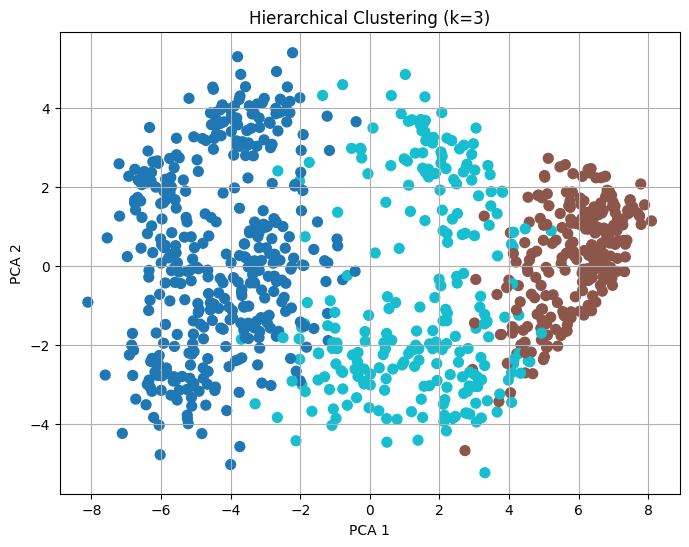

In [217]:
from scipy.cluster.hierarchy import fcluster

hc_labels = fcluster(linkage_matrix, t=3, criterion='maxclust')

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hc_labels, cmap='tab10', s=50)
plt.title('Hierarchical Clustering (k=3)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

In [218]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=4, min_samples=8)  
db_labels = dbscan.fit_predict(X_pca)

print("Clusters:", len(set(db_labels)) - (1 if -1 in db_labels else 0))
print("Noise points:", list(db_labels).count(-1))

Clusters: 2
Noise points: 272


In [219]:
import numpy as np

n_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)
n_noise = list(db_labels).count(-1)

print("Estimated number of clusters:", n_clusters)
print("Estimated number of noise points:", n_noise)

Estimated number of clusters: 2
Estimated number of noise points: 272


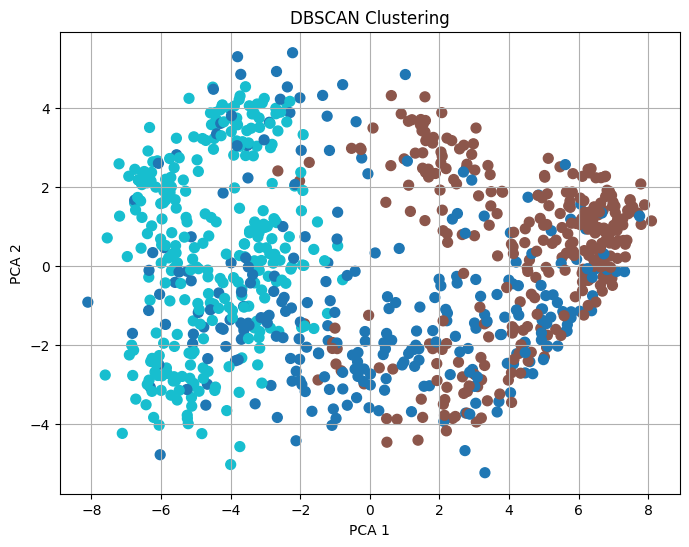

In [220]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=db_labels, cmap='tab10', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

In [221]:
# for min_samples in [5, 6, 7, 8]:
#     for eps in np.arange(3.0, 5.5, 0.1):
#         db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_pca)
#         labels = db.labels_
#         n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
#         n_noise = list(labels).count(-1)
#         if n_clusters > 1:
#             score = silhouette_score(X_pca, labels)
#             print(f"eps={eps:.1f}, min_samples={min_samples}, Clusters={n_clusters}, Noise={n_noise}, Silhouette={score:.2f}")


array([-1,  0,  1])

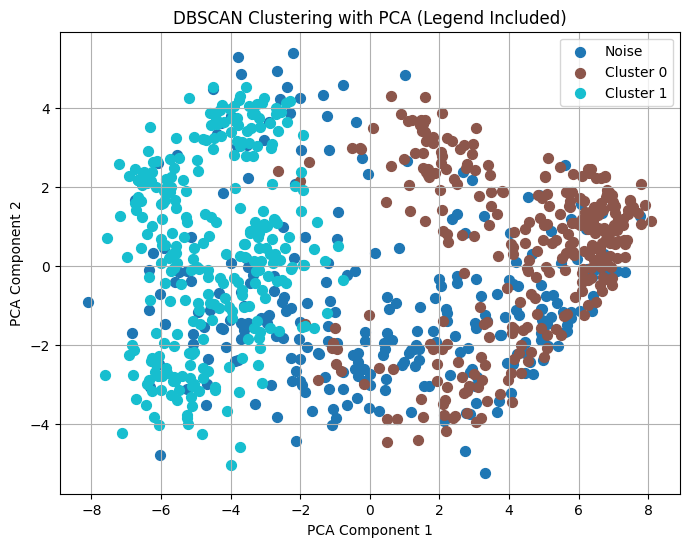

In [222]:
unique_labels = np.unique(db_labels)
display(unique_labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(8, 6))

for k, col in zip(unique_labels, colors):
    class_member_mask = (db_labels == k)
    label_name = f"Cluster {k}" if k != -1 else "Noise"
    
    plt.scatter(
        X_pca[class_member_mask, 0], 
        X_pca[class_member_mask, 1], 
        s=50, 
        color=col, 
        label=label_name
    )

plt.title('DBSCAN Clustering with PCA (Legend Included)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()